# PANDEMI COVID-19 #DiRumahAja #DoubleMasker

In [2]:
bersatulawancovid = ["cuci tangan", "pakai masker", "jaga jarak"]
print(bersatulawancovid)

['cuci tangan', 'pakai masker', 'jaga jarak']


## Mengakses API covid.go.id

In [3]:
import requests
covid = requests.get("https://data.covid19.go.id/public/api/update.json")

## Status Code

In [4]:
print(covid)

<Response [200]>


## Headers API

In [5]:
print(covid.headers)

{'Server': 'nginx', 'Date': 'Sat, 10 Jul 2021 08:23:05 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Sat, 10 Jul 2021 07:54:40 GMT', 'ETag': 'W/"60e95240-2eaac"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


## Mengekstrak Isi Data Covid

In [6]:
covid_raw=covid.json()

## Mengekstrak Isi Data Covid-2

In [7]:
print("Length of covid_raw : %d." %len(covid_raw))
print("Komponen of covid_raw : %s." %covid_raw.keys())
covid_update = covid_raw["update"]

Length of covid_raw : 2.
Komponen of covid_raw : dict_keys(['data', 'update']).


## Analisis Data Covid

In [8]:
print("Tanggal pembaharuan data penambahan kasus :", covid_update["penambahan"]["tanggal"])
print("Jumlah penambahan kasus sembuh:", covid_update["penambahan"]["jumlah_sembuh"])
print("Jumlah penambahan kasus meninggal :", covid_update["penambahan"]["jumlah_meninggal"])
print("Jumlah total kasus positif hingga saat ini :", covid_update["total"]["jumlah_positif"])
print("Jumlah total kasus meninggal hingga saat ini :", covid_update["total"]["jumlah_meninggal"])

Tanggal pembaharuan data penambahan kasus : 2021-07-09
Jumlah penambahan kasus sembuh: 28975
Jumlah penambahan kasus meninggal : 871
Jumlah total kasus positif hingga saat ini : 2455912
Jumlah total kasus meninggal hingga saat ini : 64631


## Apa Kabar Jawa Tengah?

In [9]:
import requests
covid_jateng = requests.get("https://data.covid19.go.id/public/api/prov_detail_JAWA_TENGAH.json")
covid_jateng_raw = covid_jateng.json()

## COVID-19 di Jawa Tengah, Statistisc & Fact

In [10]:
print("Nama-nama elemen utama:\n", covid_jateng_raw.keys())
print("\nJumlah total kasus COVID-19 di Jawa Tengah : %d" %covid_jateng_raw["kasus_total"])
print("persentase kematian akibat COVID-19 di Jawa Tengah : %f.2%%" %covid_jateng_raw["meninggal_persen"])
print("persentase tingkat kesembuhan dari COVID-19 di Jawa Tengah : %f.2%%" %covid_jateng_raw["sembuh_persen"])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Tengah : 285348
persentase kematian akibat COVID-19 di Jawa Tengah : 4.402344.2%
persentase tingkat kesembuhan dari COVID-19 di Jawa Tengah : 78.397606.2%


## JATENG ZONA MERAH!!! 
### #DiRumahAja #DoubleMasker #CuciTangan

In [11]:
import numpy as np
import pandas as pd
covid_jateng = pd.DataFrame(covid_jateng_raw["list_perkembangan"])
print("Info covid_jateng :\n", covid_jateng.info())
print('\nLima data teratas covid_jateng :\n', covid_jateng.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       489 non-null    int64
 1   KASUS                         489 non-null    int64
 2   MENINGGAL                     489 non-null    int64
 3   SEMBUH                        489 non-null    int64
 4   DIRAWAT_OR_ISOLASI            489 non-null    int64
 5   AKUMULASI_KASUS               489 non-null    int64
 6   AKUMULASI_SEMBUH              489 non-null    int64
 7   AKUMULASI_MENINGGAL           489 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  489 non-null    int64
dtypes: int64(9)
memory usage: 34.5 KB
Info covid_jateng :
 None

Lima data teratas covid_jateng :
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583625600000      1          1       0                   0   
1  1583712000000      0          0   

In [12]:
covid_jateng_tidy = (covid_jateng.drop(columns=[item for item in covid_jateng.columns
																if item.startswith('AKUMULASI')
																or item.startswith('DIRAWAT')])
												.rename(columns=str.lower)
												.rename(columns={'kasus': 'kasus_baru'})
				  )
covid_jateng_tidy['tanggal'] = pd.to_datetime(covid_jateng_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', covid_jateng_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-08           1          1       0
1 2020-03-09           0          0       0
2 2020-03-10           0          0       0
3 2020-03-11           2          1       1
4 2020-03-12           0          0       0


## Visualisasi Data Covid-19 

<Figure size 432x288 with 0 Axes>

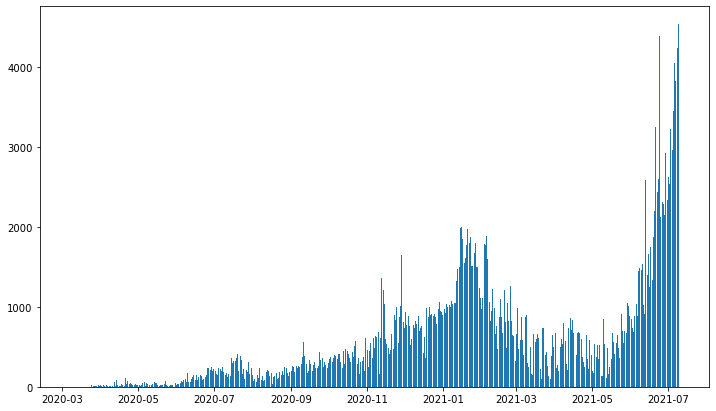

In [13]:
import matplotlib.pyplot as plt
plt.clf()
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=covid_jateng_tidy, x = "tanggal", height = "kasus_baru")
plt.show()

## Kasus Harian Positif COVID-19 Jawa Tengah

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

<Figure size 432x288 with 0 Axes>

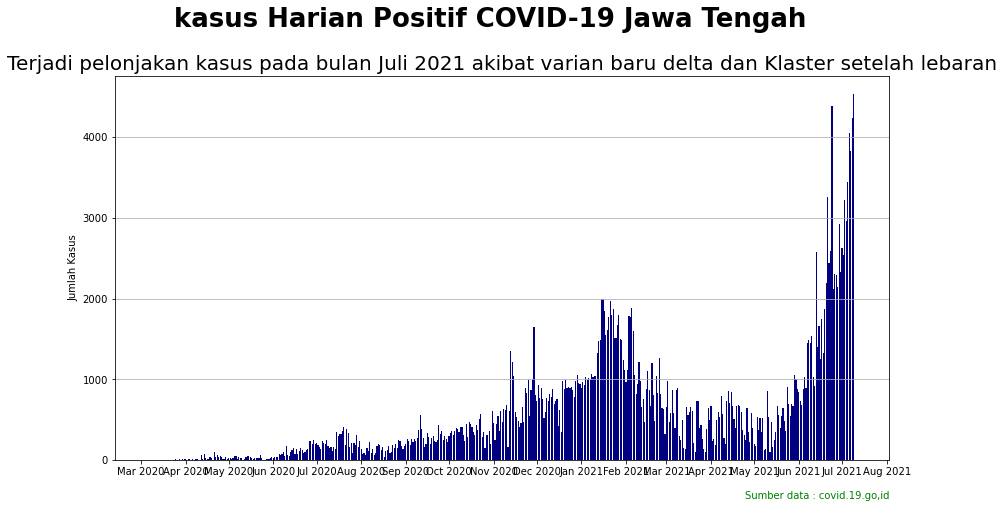

In [17]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=covid_jateng_tidy, x="tanggal", height="kasus_baru", color="navy")
fig.suptitle("kasus Harian Positif COVID-19 Jawa Tengah", y=1.00, fontsize=26, fontweight="bold", ha="center")
ax.set_title("Terjadi pelonjakan kasus pada bulan Juli 2021 akibat varian baru delta dan Klaster setelah lebaran", 
             fontsize = 20)
ax.set_xlabel("")
ax.set_ylabel("Jumlah Kasus")
ax.text(1, -0.1, "Sumber data : covid.19.go,id", color="green", ha="right", transform=ax.transAxes)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.grid(axis="y")
plt.tight_layout()
plt.show()

## Kasus Harian Sembuh COVID-19 Jawa Tengah

<Figure size 432x288 with 0 Axes>

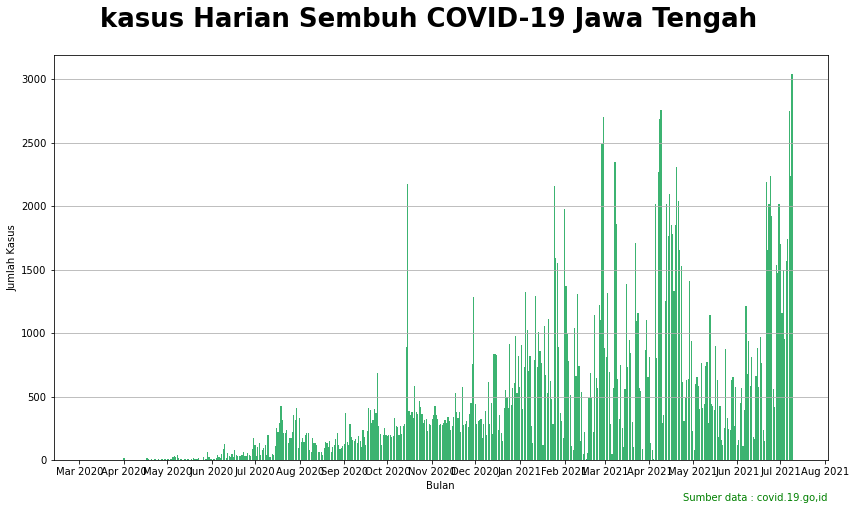

In [18]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=covid_jateng_tidy, x="tanggal", height="sembuh", color="mediumseagreen")
fig.suptitle("kasus Harian Sembuh COVID-19 Jawa Tengah", y=1.00, fontsize=26, fontweight="bold", ha="center")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Kasus")
ax.text(1, -0.1, "Sumber data : covid.19.go,id", color="green", ha="right", transform=ax.transAxes)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.grid(axis="y")
plt.tight_layout()
plt.show()

## Kasus Harian Meninggal COVID-19 Jawa Tengah

<Figure size 432x288 with 0 Axes>

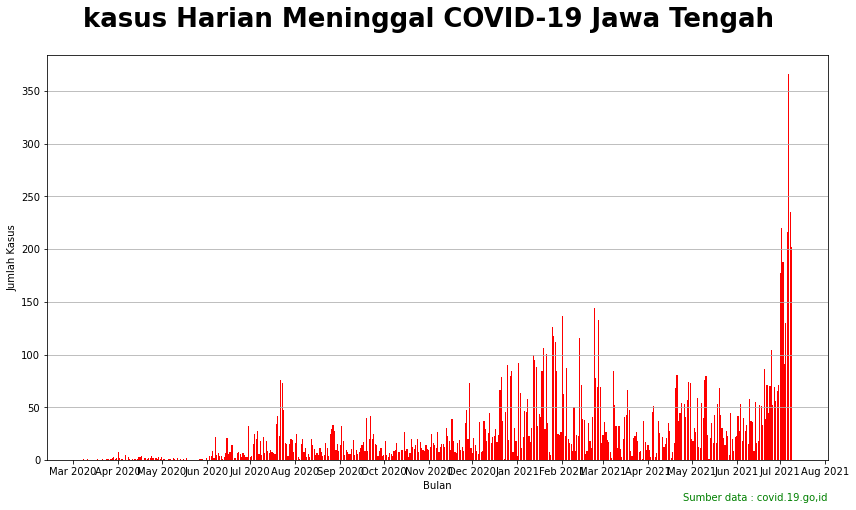

In [19]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=covid_jateng_tidy, x="tanggal", height="meninggal", color="red")
fig.suptitle("kasus Harian Meninggal COVID-19 Jawa Tengah", y=1.00, fontsize=26, fontweight="bold", ha="center")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Kasus")
ax.text(1, -0.1, "Sumber data : covid.19.go,id", color="green", ha="right", transform=ax.transAxes)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.grid(axis="y")
plt.tight_layout()
plt.show()

## Mengetahui Apakah Dengan Adanya PPKM Darurat di Jawa Tengah Angka Kasus COVID-19 Membaik?

In [20]:
covid_jateng_pekanan=(covid_jateng_tidy.set_index("tanggal")["kasus_baru"]
                     .resample("W")
                     .sum()
                     .reset_index()
                     .rename(columns={"kasus_baru": "jumlah"})
                     )
covid_jateng_pekanan["tahun"] = covid_jateng_pekanan["tanggal"].apply(lambda x:x.year)
covid_jateng_pekanan["pekan_ke"] = covid_jateng_pekanan["tanggal"].apply(lambda x: x.weekofyear)
covid_jateng_pekanan = covid_jateng_pekanan[["tahun", "pekan_ke", "jumlah"]]

print("Info covid_jateng_pekanan:")
print(covid_jateng_pekanan.info())
print('\nLima data teratas covid_jateng_pekanan:\n', covid_jateng_pekanan.head())

Info covid_jateng_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     71 non-null     int64
 1   pekan_ke  71 non-null     int64
 2   jumlah    71 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB
None

Lima data teratas covid_jateng_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       1
1   2020        11       5
2   2020        12      12
3   2020        13      64
4   2020        14      91


In [21]:
covid_jateng_pekanan["jumlah_pekanlalu"]= covid_jateng_pekanan["jumlah"].shift().replace(np.nan, 0).astype(np.int)
covid_jateng_pekanan["lebih_baik"]=covid_jateng_pekanan["jumlah"]< covid_jateng_pekanan["jumlah_pekanlalu"]

print("Sepuluh data teratas:\n", covid_jateng_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       1                 0       False
1   2020        11       5                 1       False
2   2020        12      12                 5       False
3   2020        13      64                12       False
4   2020        14      91                64       False
5   2020        15     123                91       False
6   2020        16     212               123       False
7   2020        17     350               212       False
8   2020        18     175               350        True
9   2020        19     246               175       False


## Kasus Pekanan Positif COVID-19 di Jawa Tengah

<Figure size 432x288 with 0 Axes>

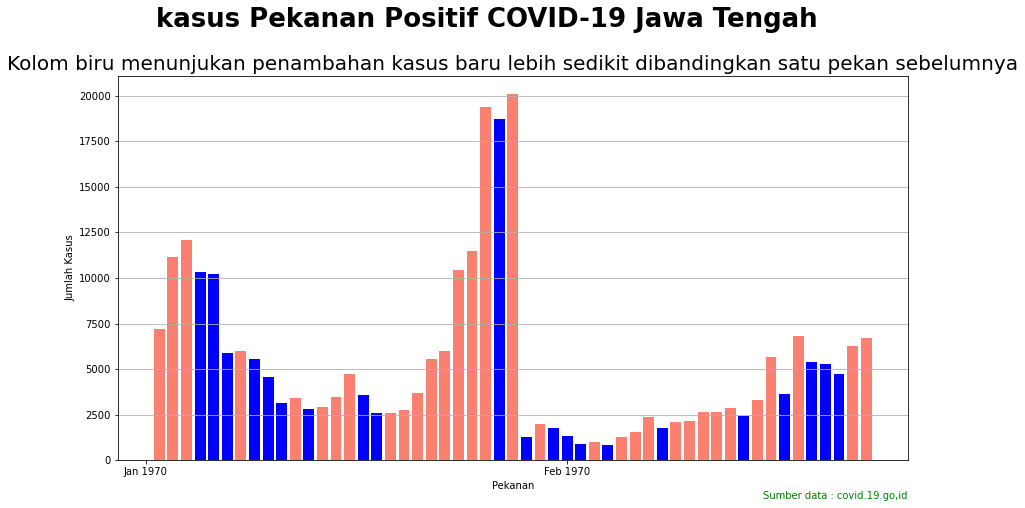

In [22]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=covid_jateng_pekanan, x='pekan_ke', height='jumlah',
color=['blue' if x is True else 'salmon' for x in covid_jateng_pekanan['lebih_baik']])
fig.suptitle("kasus Pekanan Positif COVID-19 Jawa Tengah", y=1.00, fontsize=26, fontweight="bold", ha="center")
ax.set_title("Kolom biru menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya", fontsize =20)
ax.set_xlabel("Pekanan")
ax.set_ylabel("Jumlah Kasus")
ax.text(1, -0.1, "Sumber data : covid.19.go,id", color="green", ha="right", transform=ax.transAxes)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.grid(axis="y")
plt.tight_layout()
plt.show()

## Dinamika COVID-19 di Jawa Tengah

In [23]:
covid_jateng_akumulasi = covid_jateng_tidy[["tanggal"]].copy()
covid_jateng_akumulasi["akumulasi_aktif"] = (covid_jateng_tidy["kasus_baru"] - covid_jateng_tidy["sembuh"] - covid_jateng_tidy["meninggal"]).cumsum()
covid_jateng_akumulasi["akumulasi_sembuh"] = covid_jateng_tidy["sembuh"].cumsum()
covid_jateng_akumulasi["akumulasi_meninggal"] = covid_jateng_tidy["meninggal"].cumsum()
covid_jateng_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
484,2021-07-05,43261,213920,11534
485,2021-07-06,45352,215661,11750
486,2021-07-07,46062,218408,12116
487,2021-07-08,47820,220647,12351
488,2021-07-09,49106,223689,12553


## Visualisasi Kasus Akumulasi Aktif COVID-19 di Jawa Tengah

<Figure size 432x288 with 0 Axes>

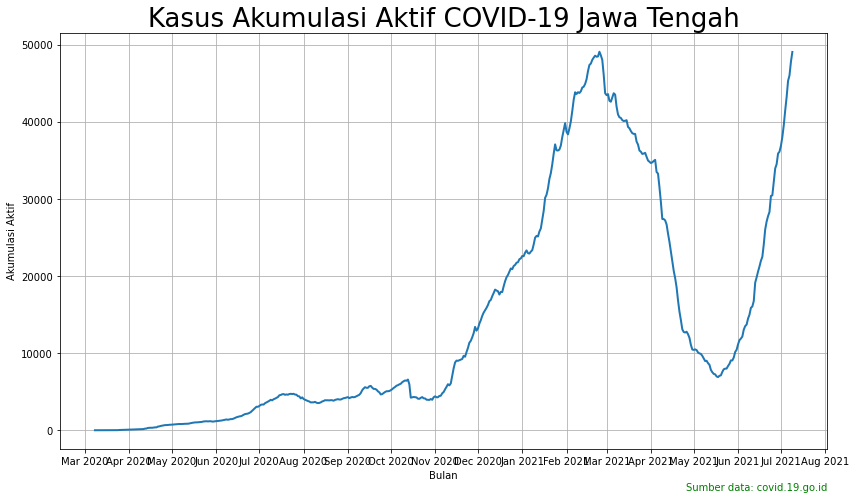

In [24]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,7))
ax.plot("tanggal", "akumulasi_aktif", data=covid_jateng_akumulasi, lw=2)

ax.set_title("Kasus Akumulasi Aktif COVID-19 Jawa Tengah", fontsize = 26)
ax.set_xlabel("Bulan")
ax.set_ylabel("Akumulasi Aktif")
ax.text(1, -0.1, "Sumber data: covid.19.go.id", color ="green", ha="right", transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
    
plt.grid()
plt.tight_layout()
plt.show()

## Dinamika Kasus COVID-19 di Jawa Tengah

<Figure size 432x288 with 0 Axes>

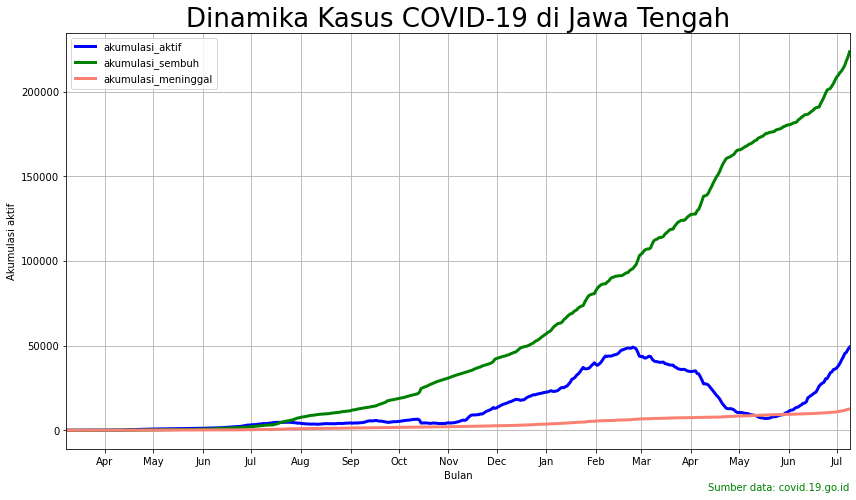

In [25]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,7))
covid_jateng_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
color=['blue', 'green', 'salmon'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Tengah',
fontsize=26)
ax.set_xlabel('Bulan')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='green',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()